# Workflow Exploration

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import networkx as nx
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from IPython.core.pylabtools import figsize
from community import best_partition, modularity

## Step 1 数据建模

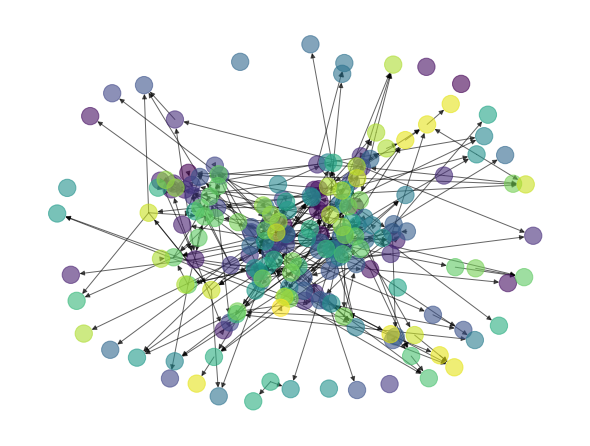

In [0]:
G = nx.gaussian_random_partition_graph(200,8,3,0.1,0.005)
c = [d['block'] for n,d in G.nodes(data = True)]
figsize(8,6)
nx.draw(G,alpha = 0.6,node_color=c)

## Step 2 数据探索

**分布研究以下统计信息的分布，并可视化展示**

1. degree centrality - 每个节点连接了多少个其他的几点
2. degree centrality - 节点的度中心性，连接节点的多少，归一化
3. betweenness centrality - 节点的介中心性，通过节点的最短路径数量 - 比例
4. closeness centrality - 节点距离其他所有的节点的距离远近
5. eigenvector centrality - 节点的特征向量中心性 - 节点邻居的重要性决定了节点的特征向量中心度
6. in degree centrality -  有向图中进入节点的度中心性
7. out degree centrality - 有向图中离开节点的度中心性
8. page rank score - if possible

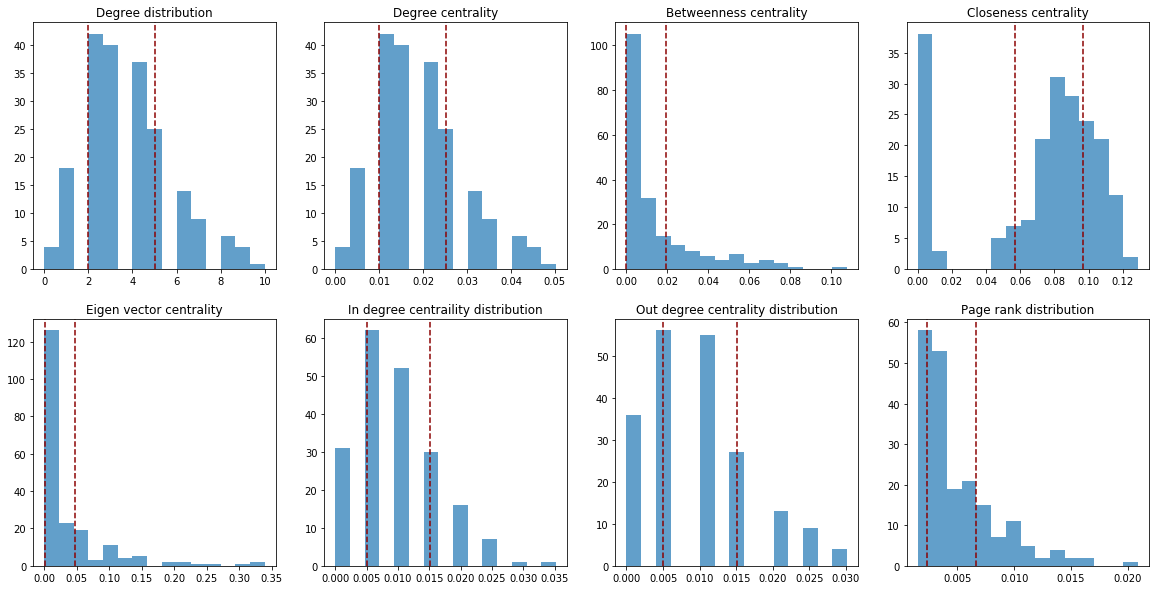

In [0]:
deg = [deg for node,deg in dict(G.degree()).items()]

dc = nx.degree_centrality(G)
dc_dist = [c for n,c in dc.items()]

bc = nx.betweenness_centrality(G)
bc_dist = [c for n,c in bc.items()]

cc = nx.closeness_centrality(G)
cc_dist = [c for n,c in cc.items()]

ec = nx.eigenvector_centrality(G)
ec_dist = [c for n,c in ec.items()]

ic = nx.in_degree_centrality(G)
ic_dist = [in_dc for n, in_dc in ic.items()]

oc = nx.out_degree_centrality(G)
oc_dist = [out_dc for n, out_dc in oc.items()]

page_rank_score = nx.pagerank(G)
page_rank_dist = [p for n, p in page_rank_score.items()]

figsize(20,10)

plt.subplot(2,4,1)
plt.hist(deg,bins = 15,alpha = 0.7)
l_ptile = np.percentile(deg,25)
u_ptile = np.percentile(deg,75)
plt.axvline(l_ptile,color = 'darkred',linestyle = '--')
plt.axvline(u_ptile,color = 'darkred',linestyle = '--')
plt.title("Degree distribution")


plt.subplot(2,4,2)
plt.hist(dc_dist,bins = 15,alpha = 0.7)
l_ptile = np.percentile(dc_dist,25)
u_ptile = np.percentile(dc_dist,75)
plt.axvline(l_ptile,color = 'darkred',linestyle = '--')
plt.axvline(u_ptile,color = 'darkred',linestyle = '--')
plt.title("Degree centrality")


plt.subplot(2,4,3)
plt.hist(bc_dist,bins = 15,alpha = 0.7)
l_ptile = np.percentile(bc_dist,25)
u_ptile = np.percentile(bc_dist,75)
plt.axvline(l_ptile,color = 'darkred',linestyle = '--')
plt.axvline(u_ptile,color = 'darkred',linestyle = '--')
plt.title("Betweenness centrality")


plt.subplot(2,4,4)
plt.hist(cc_dist,bins = 15,alpha = 0.7)
l_ptile = np.percentile(cc_dist,25)
u_ptile = np.percentile(cc_dist,75)
plt.axvline(l_ptile,color = 'darkred',linestyle = '--')
plt.axvline(u_ptile,color = 'darkred',linestyle = '--')
plt.title("Closeness centrality")


plt.subplot(2,4,5)
plt.hist(ec_dist,bins = 15,alpha = 0.7)
l_ptile = np.percentile(ec_dist,25)
u_ptile = np.percentile(ec_dist,75)
plt.axvline(l_ptile,color = 'darkred',linestyle = '--')
plt.axvline(u_ptile,color = 'darkred',linestyle = '--')
plt.title("Eigen vector centrality")


plt.subplot(2,4,6)
plt.hist(ic_dist,bins = 15,alpha = 0.7)
l_ptile = np.percentile(ic_dist,25)
u_ptile = np.percentile(ic_dist,75)
plt.axvline(l_ptile,color = 'darkred',linestyle = '--')
plt.axvline(u_ptile,color = 'darkred',linestyle = '--')
plt.title("In degree centraility distribution")


plt.subplot(2,4,7)
plt.hist(oc_dist,bins = 15,alpha = 0.7)
l_ptile = np.percentile(oc_dist,25)
u_ptile = np.percentile(oc_dist,75)
plt.axvline(l_ptile,color = 'darkred',linestyle = '--')
plt.axvline(u_ptile,color = 'darkred',linestyle = '--')
plt.title("Out degree centrality distribution")


plt.subplot(2,4,8)
plt.hist(page_rank_dist,bins = 15,alpha = 0.7)
l_ptile = np.percentile(page_rank_dist,25)
u_ptile = np.percentile(page_rank_dist,75)
plt.axvline(l_ptile,color = 'darkred',linestyle = '--')
plt.axvline(u_ptile,color = 'darkred',linestyle = '--')
plt.title("Page rank distribution")
plt.show()


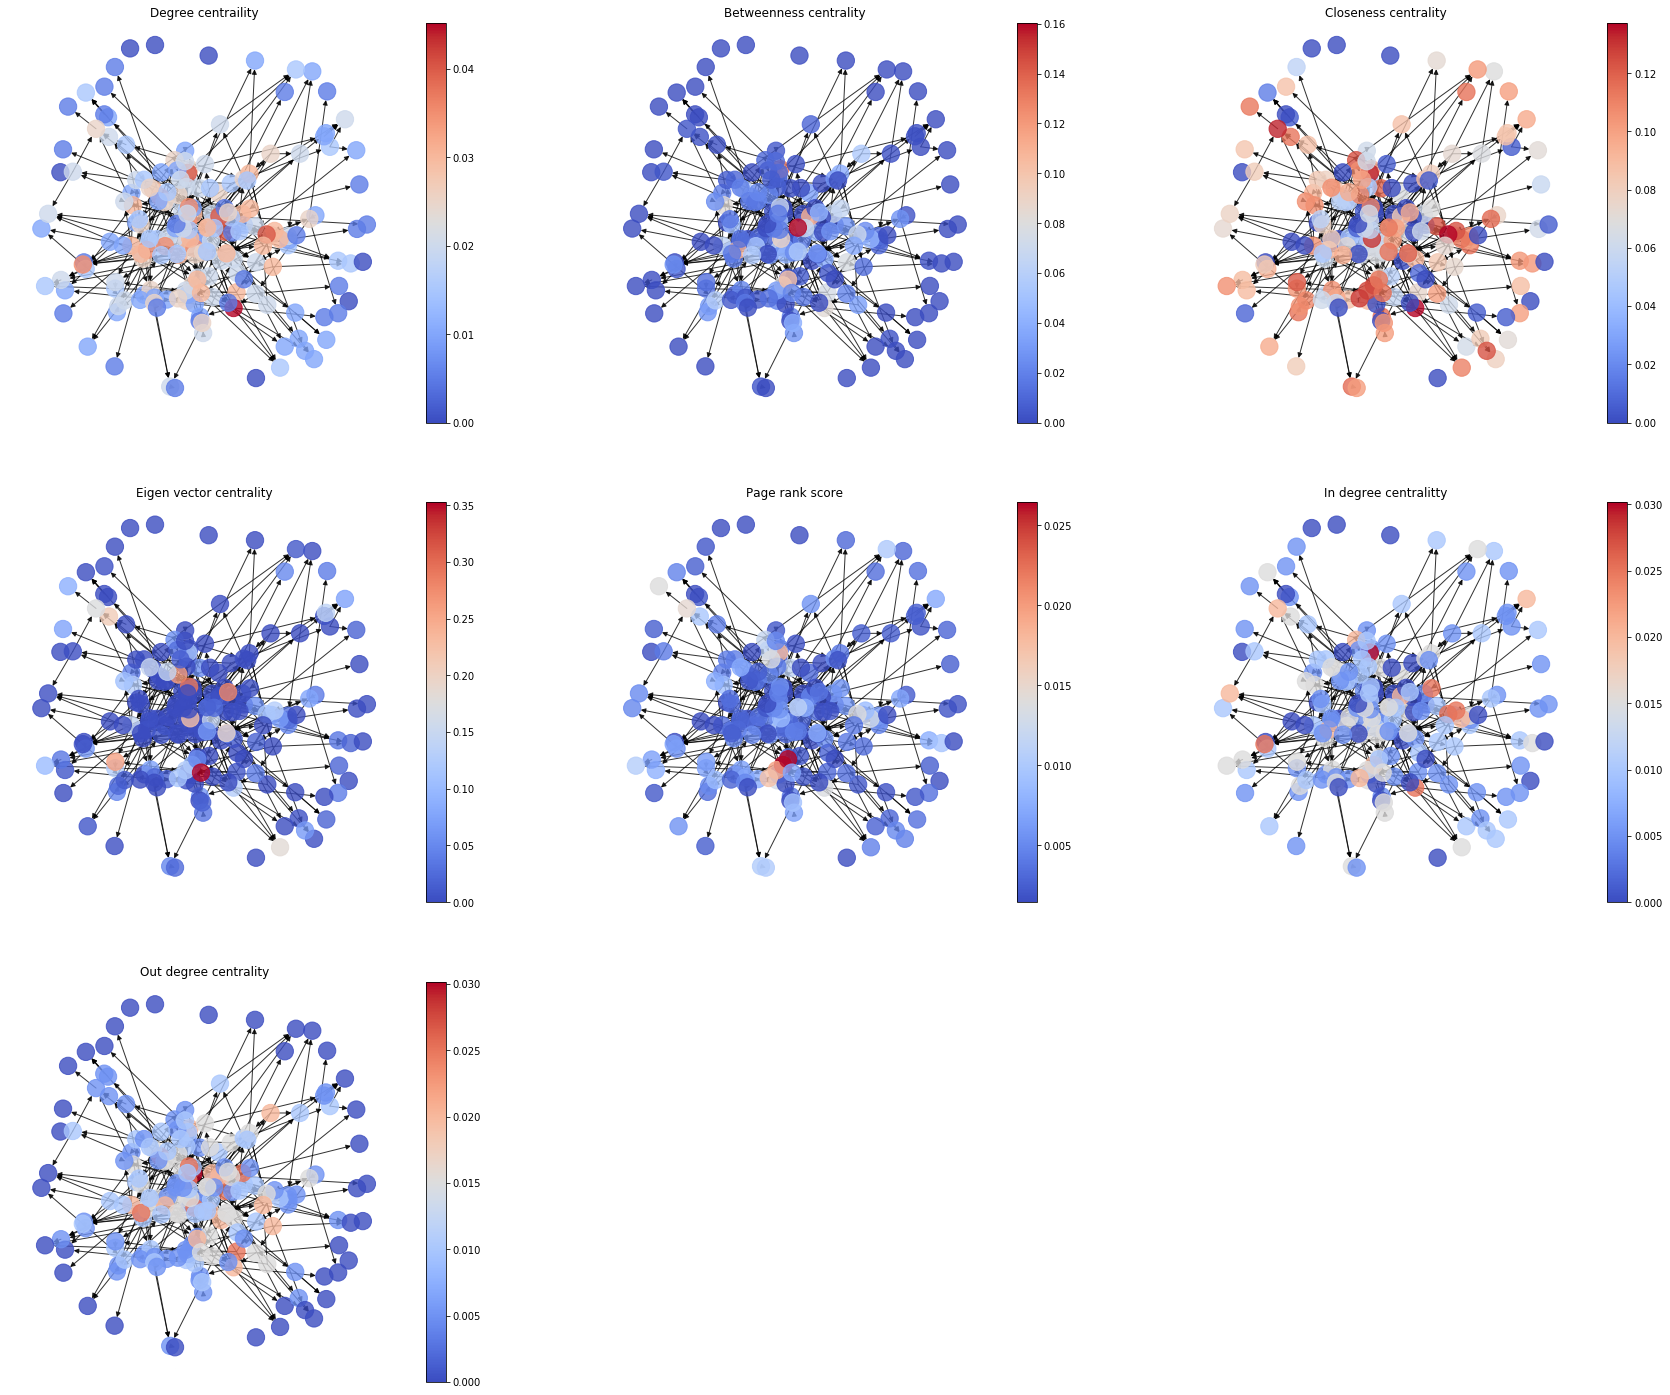

In [0]:
def draw_distribution(G,dist,plt,with_labels = True,pos = None):
    cmap = plt.cm.coolwarm
    nx.draw(G,alpha = 0.8,node_color=dist,cmap = cmap,with_labels = with_labels,pos = pos)
    vmin = min(dist)
    vmax = max(dist)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    cbar = plt.colorbar(sm)
    
pos = nx.spring_layout(G)

figsize(30,25)

plt.subplot(3,3,1)
draw_distribution(G,dc_dist,plt,False,pos)
plt.title("Degree centraility")


plt.subplot(3,3,2)
draw_distribution(G,bc_dist,plt,False,pos)
plt.title('Betweenness centrality')

plt.subplot(3,3,3)
draw_distribution(G,cc_dist,plt,False,pos)
plt.title("Closeness centrality")


plt.subplot(3,3,4)
draw_distribution(G,ec_dist,plt,False,pos)
plt.title('Eigen vector centrality')


plt.subplot(3,3,5)
draw_distribution(G,page_rank_dist,plt,False,pos)
plt.title('Page rank score')

plt.subplot(3,3,6)
draw_distribution(G,ic_dist,plt,False,pos)
plt.title("In degree centralitty")


plt.subplot(3,3,7)
draw_distribution(G,oc_dist,plt,False,pos)
plt.title('Out degree centrality')

plt.show()


#### <span><font color='darkred'>可以根据数据分布对全图进行抽样，或过滤某些不需要的节点,减少计算量 </span>

In [0]:
# figsize(16,8)
# C = nx.Graph()
# C.add_node('Car A')
# C.add_node('Car B')
# C.add_node('Inspector X')
# C.add_edge('Car A','Car B')
# C.add_edge('Car A','Inspector X')
# C.add_edge('Car B','Inspector X')
# for node,d in C.nodes(data = True):
#     if node.startswith('C'):
#         d['bipartite'] = 1
#     elif node.startswith('I'):
#         d['bipartite'] = 2
# part = [d['bipartite'] for n,d in C.nodes(data = True)]
# plt.subplot(1,2,1)
# nx.draw(C,node_color=part,node_size = 5000,with_labels = True,cmap=plt.get_cmap('tab20'))
# plt.subplot(1,2,2)
# C.add_node('Car C',bipartite = 1)
# C.add_edge('Car C','Inspector X')
# C.add_edge('Car C','Car B')
# part = [d['bipartite'] for n,d in C.nodes(data = True)]
# nx.draw(C,node_color=part,node_size = 5000,with_labels = True,cmap=plt.get_cmap('tab20'))
# plt.show()

## Step 3 专家规则探索 - 如环在车险反欺诈中的应用


#### <span><font color='darkred'>建议在子图上进行快速数据探索</font></span>
  

**1. 文献示例为车 - 车网络，或 驾驶员 - 驾驶员网络，并未包含定损员**           
**2. 平安示例为通过时间地点等信息规则过滤**      
**3. 太平项目中，若考虑定损员，撞车的双方与定损员构成大小为3的环，A与B撞车，与定损员X构成三角，B与C撞车，B，C，X构成三角A -> B -> C -> X -> A 构成无向环，规则：撞车路径上的定损员都为X**   
**4. 若使用有向图，定损员与驾驶员只能为单向连接（不存在两个方向上的关系），即定损员（Source node）不与任何驾驶员构成环关系, 等价于在驾驶员 - 驾驶员的无向网络中查找环（两人撞车难以判断边方向，只是撞车关系）**     
    
#### <span><font color='darkred'>建议</font></span>
**1. 骗保需撞车，撞车必须上保险，能够上保险车的数量是有限的**      
**2. 骗保有团伙，持续骗保的团伙中，单人作案次数多于正常车主**       
**3. 过滤度中心度较小的车/驾驶员，单位时间内在同一城市撞车次数超过某一阈值的车辆/驾驶员，参与图计算**           
**4. 上述过滤预计能够过滤50%左右的数据（3个月内撞车次数 <= 3的节点)**       
**5. 若每一次撞车产生一条边，同一个节点，即车 / 驾驶员， 可计算定损员集中度 = 为此车主定损的定损员个数 / 撞车次数 （若每次都要找同一个定损员定损，则欺诈可能性大）**    
**6. 若撞车次数 - 定损员个数 > 3 , 或更严格 若撞车次数 $\ne$ 定损员个数,可定义节点为有定损员偏好的节点，为此节点定损次数做多的定损员为偏好定损员（有同样定损员偏好的节点是否存在某种关系）**      
**7. 可以按定损员选择子图，一个定损员定损过的所有车辆/驾驶员记为集合A, 与A发生过撞车事件的车辆记为B，按照节点集合 {A1,B1},{A2,B2}选择子图，研究欺诈模式**


#### <span><font color='darkred'>个人认为，图可以很复杂，但是环需要在简单的网络上查找</font></span>

In [0]:
def find_all_cycles(G,min_nodes = 4,max_nodes = 10):
    cycles = nx.algorithms.cycles.cycle_basis(G)
    all_cycle_edges = []

    for cycle in cycles:
        cycle_edges = []
        for i in range(len(cycle) - 1):
            cycle_edges.append((cycle[i],cycle[i+1]))
        cycle_edges.append((cycle[-1],cycle[0]))
        all_cycle_edges.append(cycle_edges)
    return [cycle for cycle in all_cycle_edges if len(cycle) >= min_nodes and len(cycle) <= max_nodes]


def draw_all_cycles(G,min_val,max_val):
    colors = ['r','g','b','darkred','pink','orange']
    figsize(8,6)
    pos = nx.spring_layout(G)
    nx.draw(G,pos = pos,with_labels = True)
    all_cycles = find_all_cycles(G,min_val,max_val)
    _ = [nx.draw_networkx_edges(G,edgelist=cycle,pos = pos,width=3,edge_color=np.random.choice(colors)) for cycle in all_cycles]
    plt.show()

    
def draw_one_cycle(G,cyc):
    nodes = set(np.array(cyc).reshape(-1))
    T = G.subgraph(nodes)
    pos = nx.spring_layout(T)
    nx.draw(T,with_labels = True,node_color='red')
    plt.title("Single cycle graph")
    plt.show()
    
    
def view_cycle(G,cyc):
    
    nodes = set(np.array(cyc).reshape(-1))
    all_nei = set()
    
    for node in nodes:
        for nei in list(G.neighbors(node)):
            all_nei.add(nei)
    all_nei = all_nei.union(set(nodes))  
    T = G.subgraph(all_nei)
    figsize(12,6)
    plt.subplot(1,2,1)

    pos = nx.spring_layout(T)
    nx.draw(T,with_labels = True,pos = pos)
    nx.draw_networkx_nodes(nodes,pos,node_color = 'red')
    nx.draw_networkx_edges(T,pos,cyc,edge_color='red')
    plt.title("Cycle Neighbors Graph")

    plt.subplot(1,2,2)
    plt.title("Original Graph")
    pos = nx.spring_layout(G)
    nx.draw(G,with_labels =  True,pos = pos)
    nx.draw_networkx_nodes(nodes,pos,node_color = 'red')
    nx.draw_networkx_edges(G,pos,cyc,edge_color='red')
    
    plt.show()

**此处，参数 4, 6 限制了环的大小，车险反欺诈文献中，环大小在 4 -  50 之间**       
**环在连环撞车的场景适用，如果能获得撞车双方的驾驶员信息，或者车信息，建模为撞车网络**  

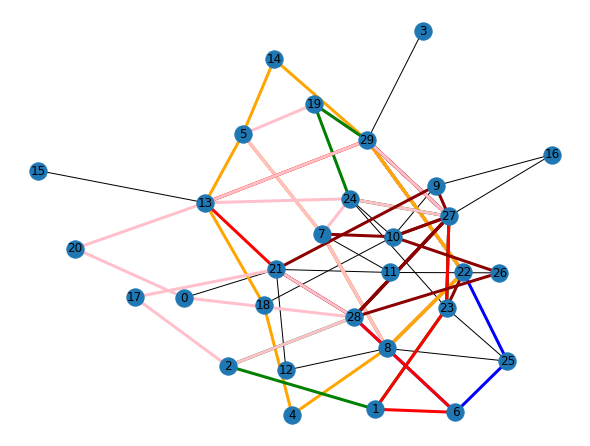

In [0]:
G = nx.erdos_renyi_graph(30,0.15)
draw_all_cycles(G,4,6)

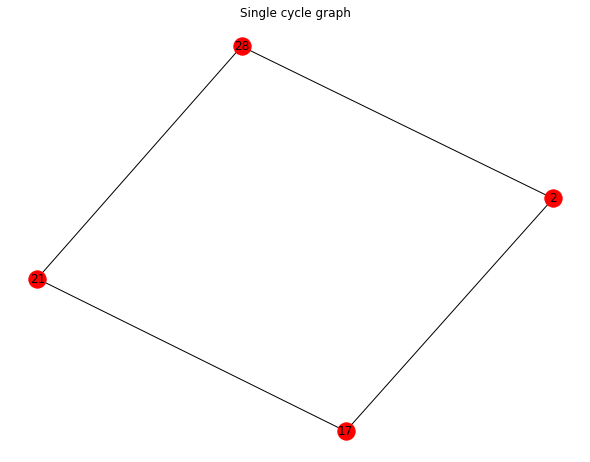

In [0]:
all_cycles = find_all_cycles(G,4,6)
cyc = all_cycles[-1]
draw_one_cycle(G,cyc)

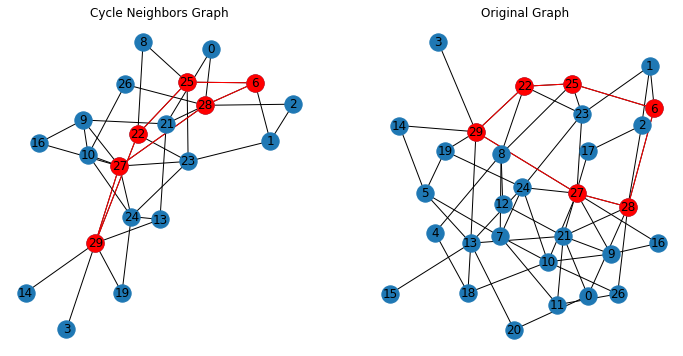

In [0]:
all_cycles = find_all_cycles(G,4,6)
cyc = all_cycles[1]
view_cycle(G,cyc)

****************************** Cycle 0 visualization. ******************************


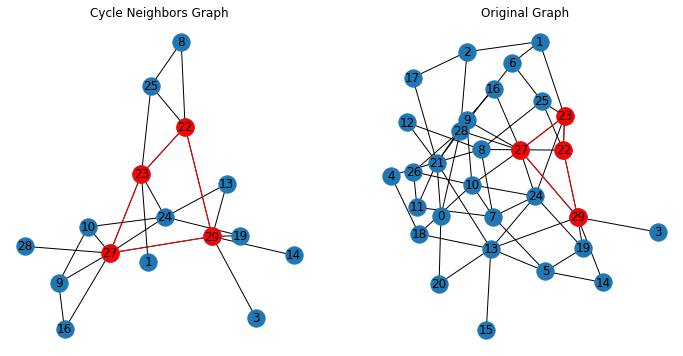

****************************** Cycle 1 visualization. ******************************


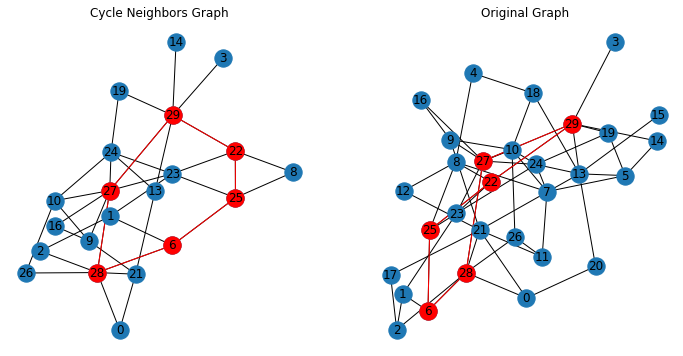

****************************** Cycle 2 visualization. ******************************


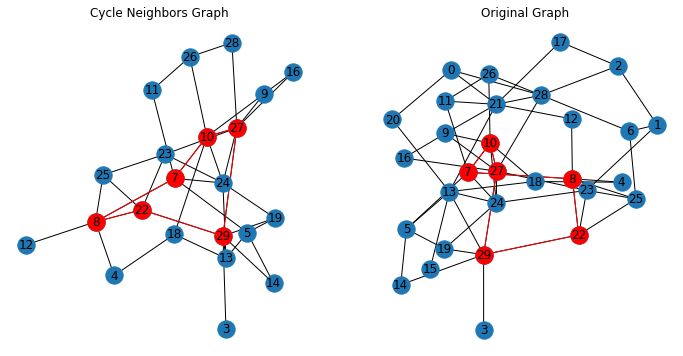

****************************** Cycle 3 visualization. ******************************


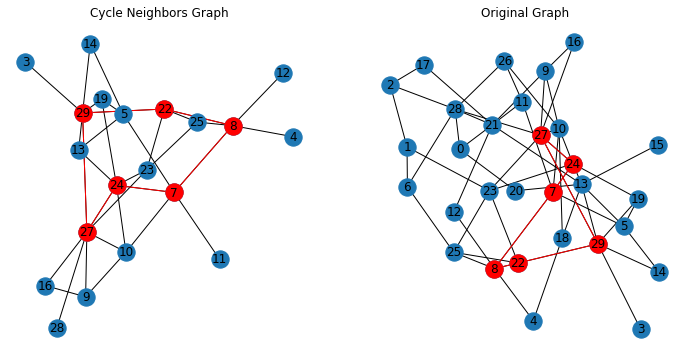

****************************** Cycle 4 visualization. ******************************


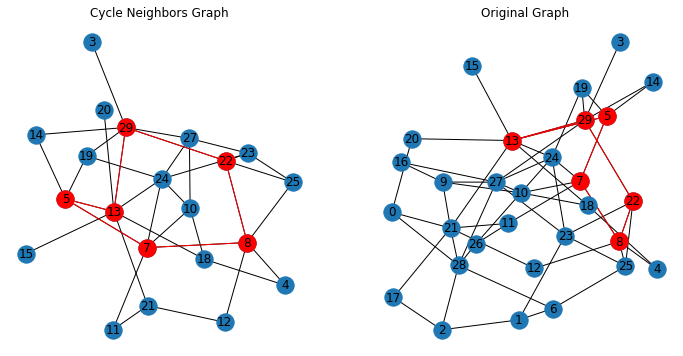

****************************** Cycle 5 visualization. ******************************


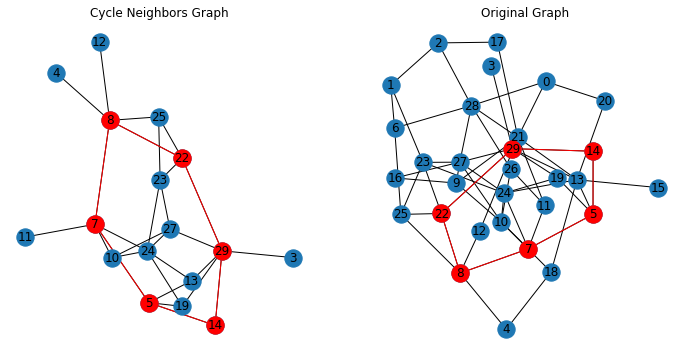

****************************** Cycle 6 visualization. ******************************


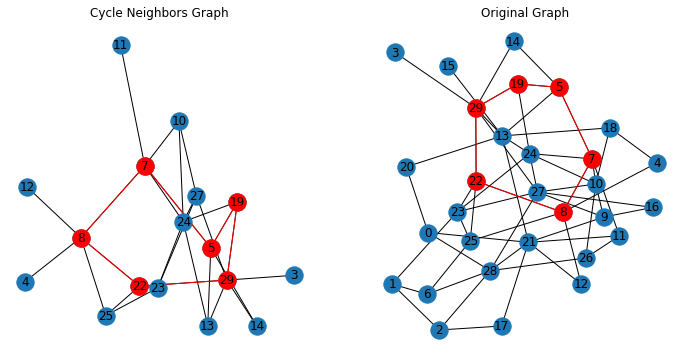

****************************** Cycle 7 visualization. ******************************


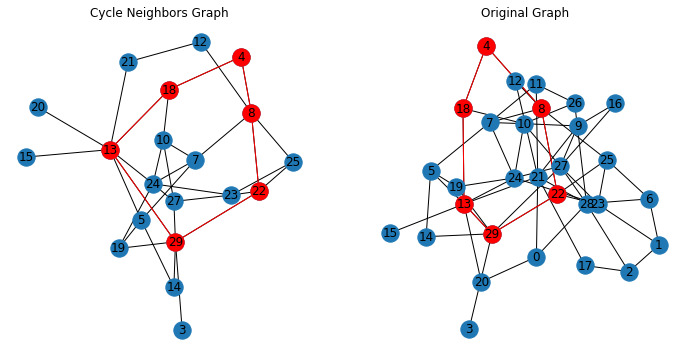

****************************** Cycle 8 visualization. ******************************


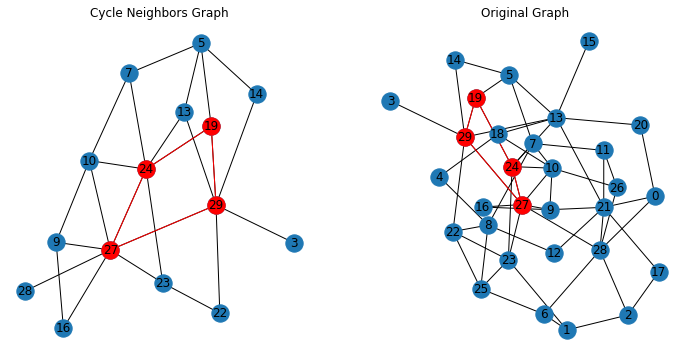

****************************** Cycle 9 visualization. ******************************


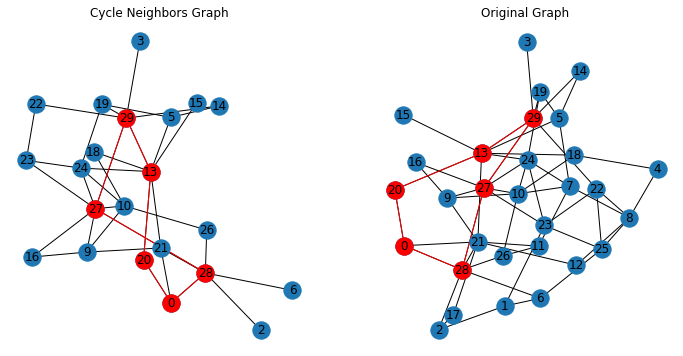

****************************** Cycle 10 visualization. ******************************


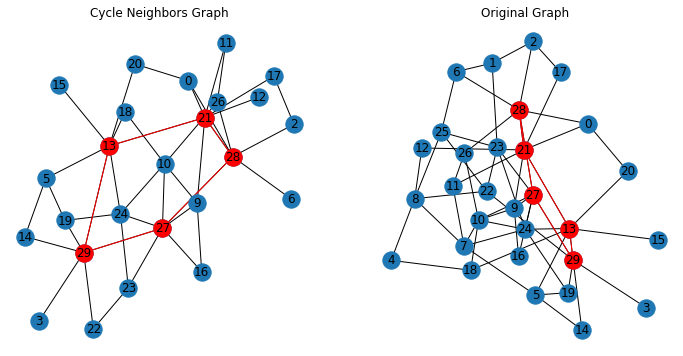

****************************** Cycle 11 visualization. ******************************


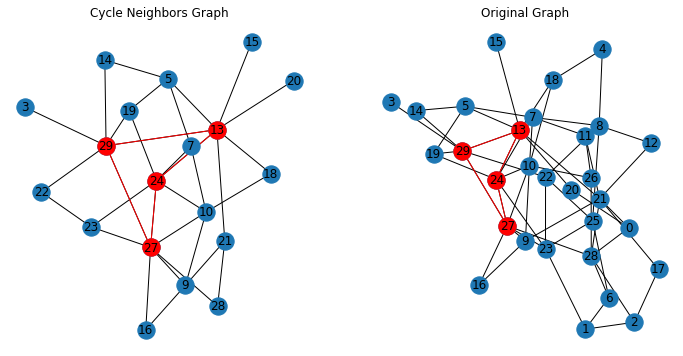

****************************** Cycle 12 visualization. ******************************


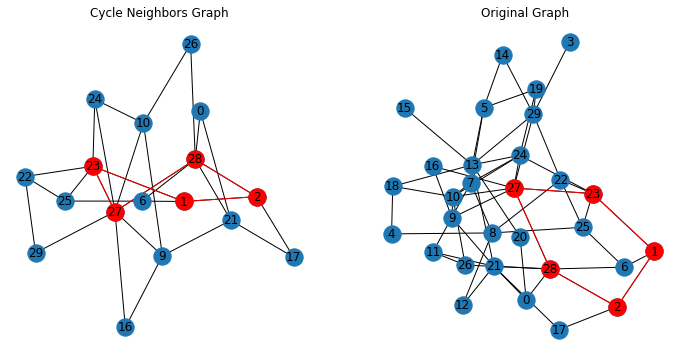

****************************** Cycle 13 visualization. ******************************


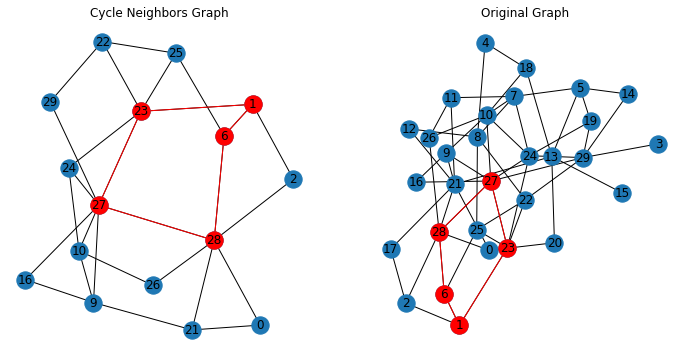

****************************** Cycle 14 visualization. ******************************


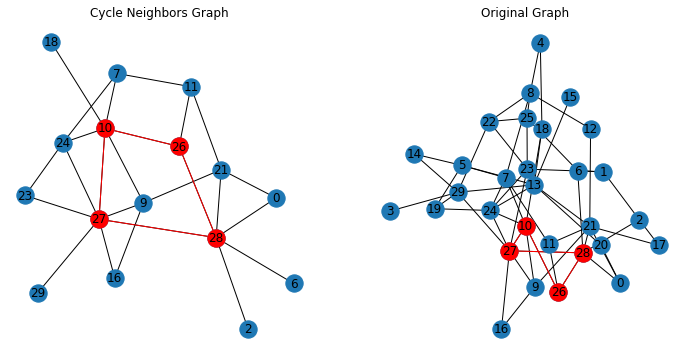

****************************** Cycle 15 visualization. ******************************


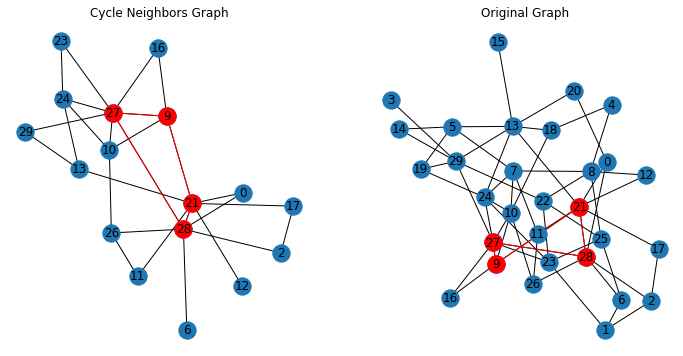

****************************** Cycle 16 visualization. ******************************


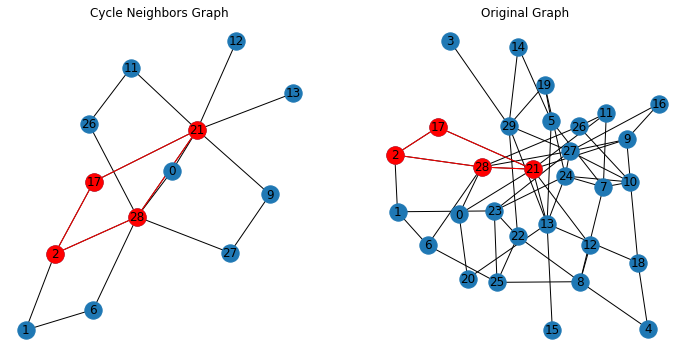

In [0]:
for i,cyc in enumerate(all_cycles):
    print('*'*30,"Cycle {} visualization.".format(i),'*'*30)
    view_cycle(G,cyc)

#### <span><font color='darkred'>与客户交流，环状结构是否存在欺诈可能，找到潜在的负样本</span>

## Step 4: 结构相似的节点聚类 (此处为实现Simrank算法)

In [0]:
def simrank_similarity_numpy(G, source=None, target=None, importance_factor=0.9, max_iterations=100, tolerance=1e-4):
    
    # adjacency matrix
    adjacency_matrix = nx.to_numpy_array(G)
    
    # normalization and ensure not divide by 0
    adjacency_matrix /= adjacency_matrix.sum(axis=0) + 1e-3
    
    # identity matrix
    newsim = np.eye(adjacency_matrix.shape[0], dtype=np.float64)
    
    # iterate
    for _ in range(max_iterations):
        prevsim = np.copy(newsim)
        newsim = importance_factor * np.matmul(
            np.matmul(adjacency_matrix.T, prevsim), adjacency_matrix)
        np.fill_diagonal(newsim, 1.0)

        if np.allclose(prevsim, newsim, atol=tolerance):
            break

    if source is not None and target is not None:
        return newsim[source, target]
    if source is not None:
        return newsim[source]
    return newsim

def most_similar_n_nodes(node,sigma,n = 3):
    return np.flip(np.argsort(sigma[node,:])[-1-n:-1].tolist())


def test_on_graph(G,n_clust = 3):
    
    sigma = simrank_similarity_numpy(G)
    mergin = linkage(sigma,method = 'complete')
    clusters =  fcluster(mergin,n_clust,'maxclust')
    
    figsize(15,6)
    plt.subplot(1,2,1)
    dendro = dendrogram(mergin)
    
    plt.subplot(1,2,2)
    nx.draw(G,node_color = clusters,with_labels = True,cmap = plt.get_cmap('tab20'))
    plt.show()
    return sigma,mergin

# G = nx.karate_club_graph()
# sigma = simrank_similarity_numpy(G)

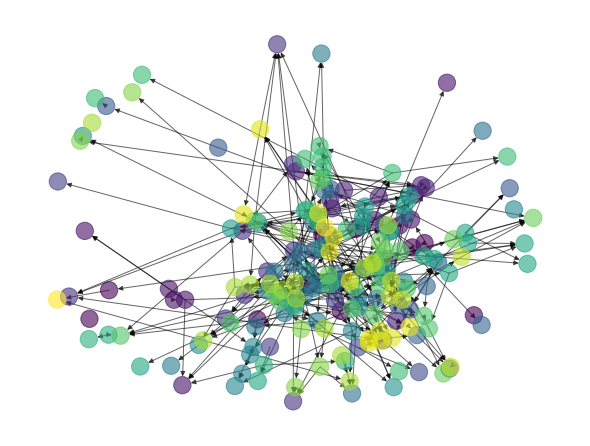

In [0]:
G = nx.gaussian_random_partition_graph(200,8,3,0.1,0.005)
c = [d['block'] for n,d in G.nodes(data = True)]
figsize(8,6)
nx.draw(G,alpha = 0.6,node_color=c)

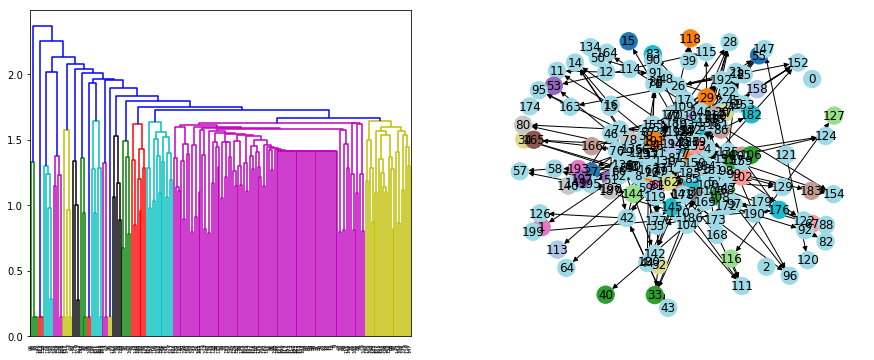

In [0]:
sigma,mergin = test_on_graph(G,15)

**与感兴趣的节点（节点194）在结构上最相似的30个节点**

In [0]:
noi = 194 # node of interest
num_similar_nodes = 30
most_similar_n_nodes(noi,sigma,num_similar_nodes)

array([  4,  85,  34, 145,  18, 182, 157, 175, 197,  35, 165,  95,  72,
       110,  77, 191, 156, 129, 176, 188,  96,  83, 106, 140,  60,  58,
       118,  74,  75, 153])

## Step 5 社团发现 (Randomwalk 4 step)

In [0]:
def random_walk_t_step(G,t = 3):
    degrees = [d for n, d in sorted(dict(nx.degree(G)).items(),key =lambda x:x[0])]
    D = np.eye(len(G.nodes))*degrees

    # incase of singular MATRIX
    for i in range(D.shape[0]):
        if D[i,i] ==0:
            D[i,i] = 1

    A = nx.adj_matrix(G).toarray()
    P = np.dot(np.linalg.inv(D),A)
    Pt = P.copy()
    for _ in range(t):
        Pt = np.dot(Pt,P)
    return Pt,D,A


def walk_trap(G,level = 4,return_json = False):
    # number of nodes in a graph
    n_nodes = len(G.nodes())

    # randomwalk t step
    Pt,D,A = random_walk_t_step(G,3)

    D_12 = np.sqrt(np.linalg.inv(D))

    # similarity matrix
    sim_mat = np.zeros((n_nodes,n_nodes))
    for i in range(n_nodes):
        for j in range(n_nodes):
            sim_ij = np.sqrt(np.square(np.dot(D_12,Pt[i,:]) - np.dot(D_12,Pt[j,:])).sum())
            sim_mat[i,j] = sim_ij

    mergeings = linkage(sim_mat,method = 'complete',metric = 'cosine')

    community = fcluster(mergeings, level,criterion = 'maxclust')
    if return_json:
        return json.dumps([{'node':int(i),'community':int(comm)} for i,comm in enumerate(community)],ensure_ascii = False)
    else:
        return community

def louvain(G,return_json = True):
    community = [comm for node, comm in best_partition(G).items()]
    if return_json:
        return json.dumps([{'node':int(i),'community':int(comm)} for i,comm in enumerate(community)],ensure_ascii = False)
    else:
        return community

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:34: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


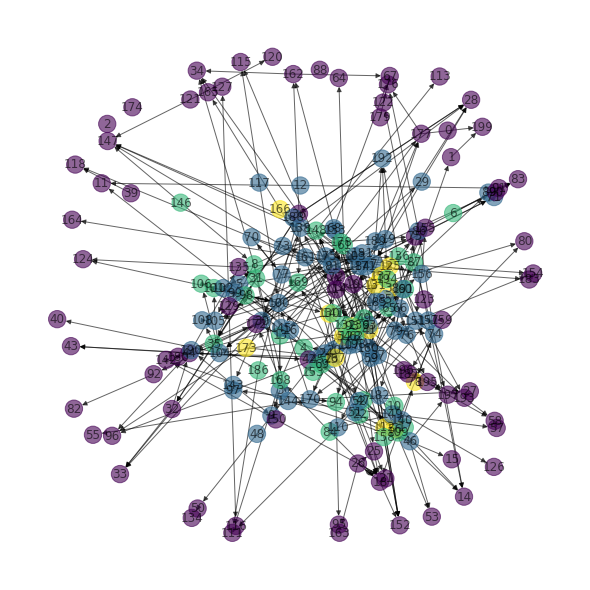

In [0]:
communities = walk_trap(G,4,False)
figsize(8,8)
nx.draw(G,alpha = 0.6,node_color=communities,with_labels = True)

**Extract nodes in same community with noi**

In [0]:
noi = 71
comm_nodes = np.where(np.array(communities) == communities[noi])[0].tolist()

**Algorithm test**

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:34: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


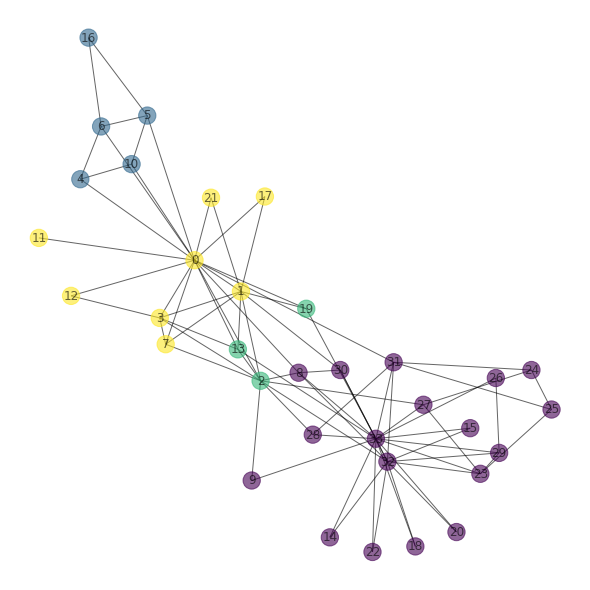

In [0]:
K = nx.karate_club_graph()
communities = walk_trap(K,4,False)
nx.draw(K,alpha = 0.6,node_color=communities,with_labels = True)

**Clique Percolation - Find community from small cliques**

In [0]:
clique_size = 4
S = nx.erdos_renyi_graph(200,0.1)
communities = nx.algorithms.community.k_clique_communities(S,clique_size)
list(communities)

[frozenset({0, 33, 132, 189}),
 frozenset({1, 116, 121, 165}),
 frozenset({2, 35, 41, 50, 111}),
 frozenset({3, 48, 114, 155}),
 frozenset({14, 116, 162, 195}),
 frozenset({20, 80, 83, 131}),
 frozenset({20, 27, 43, 91, 131}),
 frozenset({20, 103, 125, 198}),
 frozenset({21, 43, 106, 113}),
 frozenset({21, 58, 115, 157}),
 frozenset({26, 77, 86, 110}),
 frozenset({26, 30, 117, 185}),
 frozenset({27, 106, 118, 186}),
 frozenset({30, 89, 108, 170}),
 frozenset({32, 55, 66, 132, 155, 197}),
 frozenset({33, 83, 160, 168}),
 frozenset({36, 59, 85, 131, 176}),
 frozenset({41, 51, 67, 142, 144}),
 frozenset({50, 81, 120, 179, 186}),
 frozenset({54, 106, 113, 169}),
 frozenset({55, 73, 108, 144}),
 frozenset({61, 84, 109, 152}),
 frozenset({65, 71, 140, 173}),
 frozenset({65, 83, 168, 181}),
 frozenset({66, 76, 146, 147}),
 frozenset({79, 89, 137, 163}),
 frozenset({81, 87, 178, 179}),
 frozenset({84, 109, 133, 145}),
 frozenset({90, 156, 177, 199}),
 frozenset({76, 96, 129, 135}),
 frozenset(

### Fraud Simulation

#### Case 1 多定损员，多司机，团伙欺诈

欺诈司机总数：30       
正常司机总数：5000     
正常定损员总数：7     
欺诈定损员总数：3      
欺诈骗保发生概率：5%      
模拟案件个数：500   

在 [0,1] 产生随机数 a         
若 a < 欺诈发生概率：随机抽取2个欺诈司机，1个欺诈定损员,三方产生边       
若 a >= 欺诈发生概率，随机抽取2个正常司机，1个定损员（可能欺诈，也可能不欺诈），三方产生边       

构成二部图 G<V,E>, bipartite = {司机，定损员}


In [0]:
def fraud_simulation(num_fraudster = 30, 
                     num_normal = 5000, 
                     num_normal_inspector = 7,
                     num_fraud_inspector = 3,
                     fraud_ratio = 0.05,
                     num_cases = 500):
    
    fraudsters = ['d_fraud_' + str(i) for i in range(num_fraudster)]
    normal = ['d_normal_' + str(i) for i in range(num_normal)]
    driver_population = fraudsters + normal
    normal_inspector = ['i_normal_' + str(i) for i in range(num_normal_inspector)]
    fraud_inspector = ['i_fraud_' + str(i) for i in range(num_fraud_inspector)]
    inspector_population = normal_inspector + fraud_inspector

    G = nx.MultiGraph()

    cases = []
    for case in range(num_cases):

        if np.random.random() < fraud_ratio:
            # fraud case
            part1,part2 = np.random.choice(fraudsters,2)
            inspector = np.random.choice(fraud_inspector)
        else:
            # non_fraud case
            part1,part2 = np.random.choice(normal,2)
            inspector = np.random.choice(inspector_population)

        cases.append((part1,part2,inspector))
        G.add_edge(part1,part2)
        G.add_edge(part1,inspector)
        G.add_edge(part2,inspector)

    for n,d in G.nodes(data = True):
        if n.startswith('i'):
            d['bipartite'] =  1
        else:
            d['bipartite'] = 2

    partition = [d['bipartite'] for n,d in G.nodes(data = True)]
    is_fraud = [ 1 if 'fraud' in n else 2 for n in G.nodes()]
    
    return G, partition, is_fraud

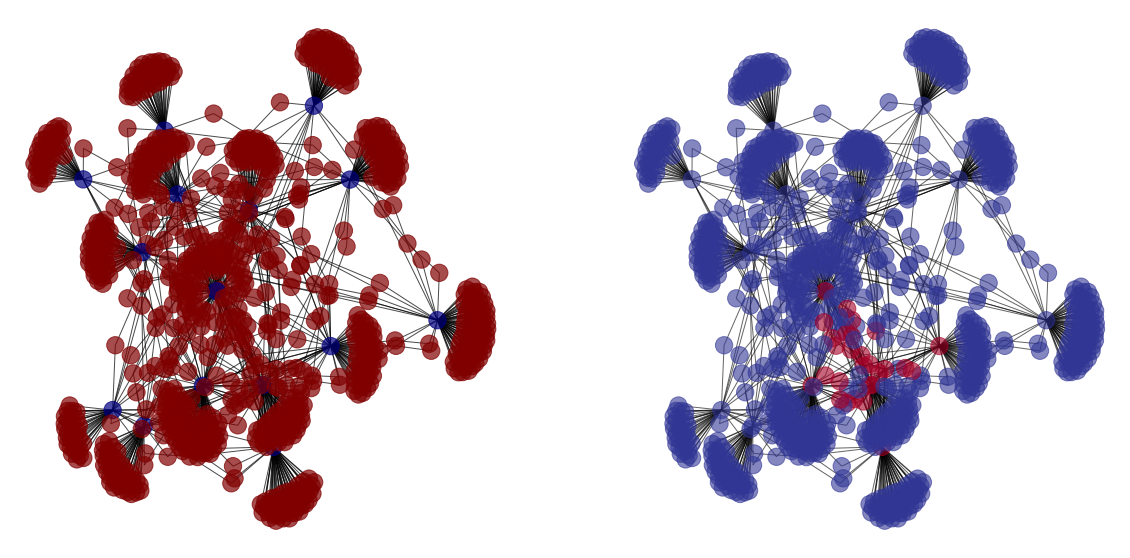

In [0]:
G,partition,is_fraud = fraud_simulation(
    num_fraudster = 30, 
    num_normal = 5000, 
    num_normal_inspector = 10,
    num_fraud_inspector = 5,
    fraud_ratio = 0.05,
    num_cases = 500)

figsize(20,10)
pos = nx.spring_layout(G)
plt.xkcd()
plt.subplot(1,2,1)
nx.draw(G,node_color = partition,alpha = 0.7,cmap='jet',pos = pos)
plt.subplot(1,2,2)
nx.draw(G,node_color = is_fraud,alpha = 0.6,cmap='RdYlBu',pos = pos)
plt.show()

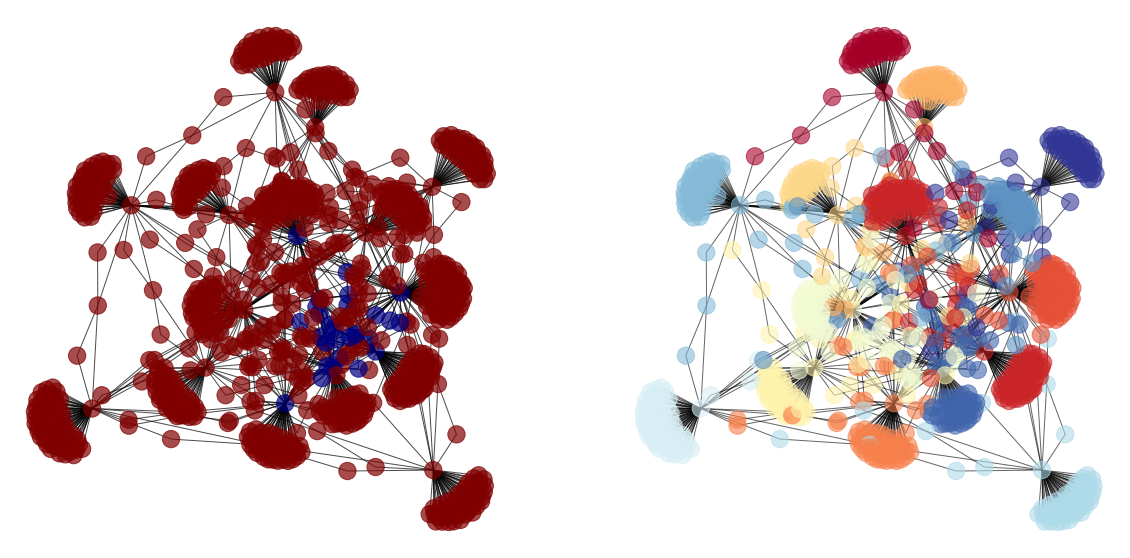

In [0]:
figsize(8,6)
fraud_inspector = [n  for n in G.nodes() if 'i_fraud' in n][0]
# F = G.subgraph(list(G.neighbors(fraud_inspector)))
F = G
is_fraud = [ 1 if 'fraud' in n else 2 for n in F.nodes()]
# pos = nx.spring_layout(F)
# nx.draw(F,node_color = is_fraud,alpha = 0.6,cmap='RdYlBu',pos = pos)
# plt.show()

comm = louvain(F,return_json=False)

figsize(20,10)
pos = nx.spring_layout(F)
plt.xkcd()
plt.subplot(1,2,1)
nx.draw(F,node_color = is_fraud,alpha = 0.7,cmap='jet',pos = pos)
plt.subplot(1,2,2)
nx.draw(F,node_color = comm,alpha = 0.6,cmap='RdYlBu',pos = pos)
plt.show()

**社群发现算法失败**

#### Case 2 单一定损员，多司机，团伙欺诈

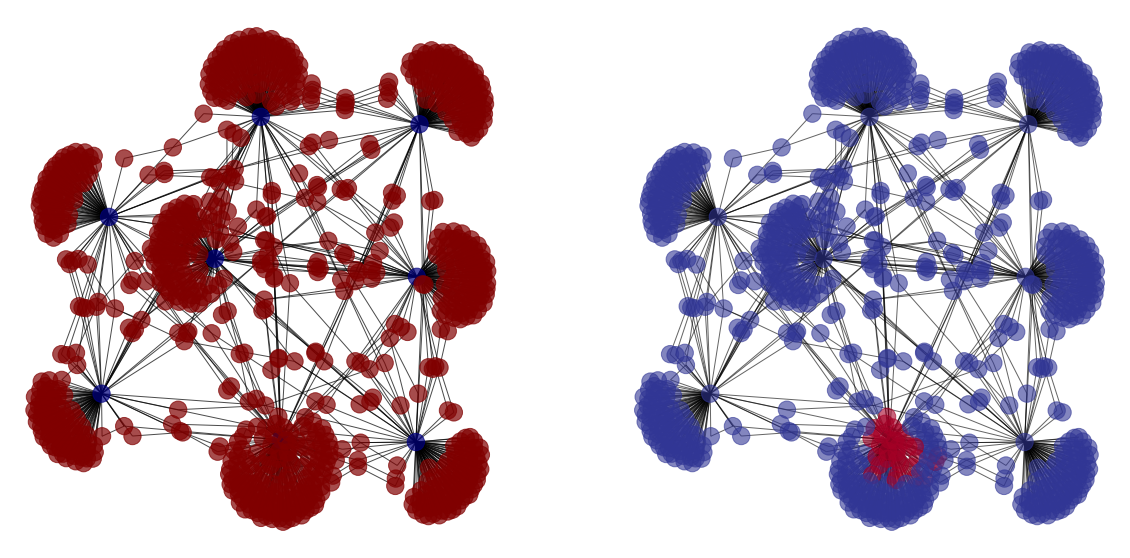

In [0]:
G,partition,is_fraud = fraud_simulation(
    num_fraudster = 30, 
    num_normal = 5000, 
    num_normal_inspector = 7,
    num_fraud_inspector = 1,
    fraud_ratio = 0.05,
    num_cases = 500)

figsize(20,10)
pos = nx.spring_layout(G)
plt.xkcd()
plt.subplot(1,2,1)
nx.draw(G,node_color = partition,alpha = 0.7,cmap='jet',pos = pos)
plt.subplot(1,2,2)
nx.draw(G,node_color = is_fraud,alpha = 0.6,cmap='RdYlBu',pos = pos)
plt.show()

**抽取定损员及其邻居子图F，使用社群发现算法**

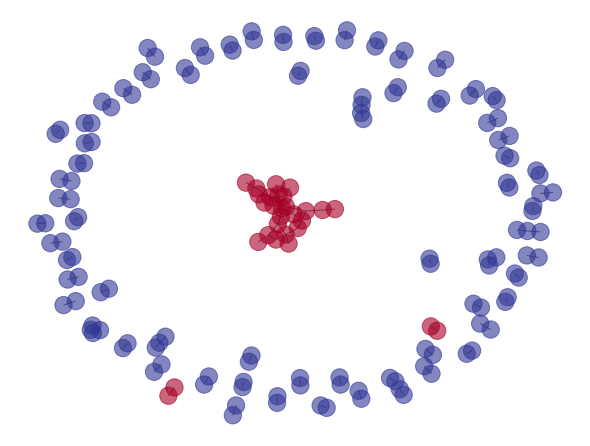

In [0]:
figsize(8,6)
fraud_inspector = [n  for n in G.nodes() if 'i_fraud' in n][0]
F = G.subgraph(list(G.neighbors(fraud_inspector)))
is_fraud = [ 1 if 'fraud' in n else 2 for n in F.nodes()]
pos = nx.spring_layout(F)
nx.draw(F,node_color = is_fraud,alpha = 0.6,cmap='RdYlBu',pos = pos)
plt.show()

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:34: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


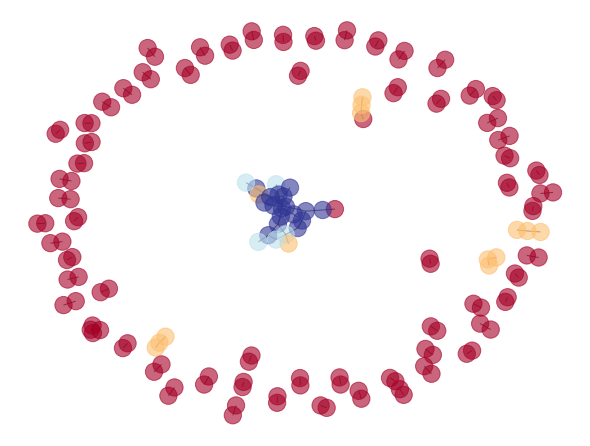

In [0]:
comm = walk_trap(F)
nx.draw(F,node_color = comm,alpha = 0.6,cmap='RdYlBu',pos = pos)
plt.show()

**社群发现算法成功**